In [2]:
!pip install torch torchvision
!pip install opencv-python-headless pillow pandas
!pip install pytesseract
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17093, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 17093 (delta 23), reused 8 (delta 7), pack-reused 17057 (from 5)
Receiving objects: 100% (17093/17093), 15.70 MiB | 12.25 MiB/s, done.
Resolving deltas: 100% (11728/11728), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 19.0 MB/s eta 0:00:00


In [3]:

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

!mv /content/best.pt /content/yolov5/


Cloning into 'yolov5'...
remote: Enumerating objects: 17093, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 17093 (delta 23), reused 8 (delta 7), pack-reused 17057 (from 5)
Receiving objects: 100% (17093/17093), 15.70 MiB | 7.30 MiB/s, done.
Resolving deltas: 100% (11728/11728), done.
/content/yolov5/yolov5


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

YOLOv5 🚀 v7.0-393-g6981c274 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


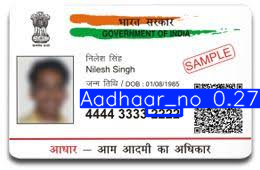

Detection Results:
          xmin       ymin        xmax        ymax  confidence  class  \
0  146.480972  107.19474  181.447678  115.212624    0.268989      0   

         name  
0  Aadhaar_no  
Debug image saved to: /content/aadhar_black_boxed_debug.jpeg
Extracted Aadhaar Numbers:
 ['']


In [10]:
!apt-get update
!apt-get install -y tesseract-ocr

import torch
import cv2
import pytesseract
from PIL import Image
import pandas as pd
from pathlib import Path

model = torch.hub.load('/content/yolov5', 'custom', path='/content/yolov5/best.pt', source='local')

def detect_aadhaar(image_path):
    img = Image.open(image_path)
    results = model(img)
    results_df = results.pandas().xyxy[0]
    results.show()
    return results_df

def extract_text_from_boxes(image_path, results_df):
    img = cv2.imread(image_path)
    aadhaar_texts = []

    for _, row in results_df.iterrows():
        xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 0), -1)
        cropped_img = img[ymin:ymax, xmin:xmax]
        gray_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
        _, thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        text = pytesseract.image_to_string(thresh_img, config='--psm 7 -c tessedit_char_whitelist=0123456789')
        aadhaar_texts.append(text.strip())

    output_path = '/content/aadhar_black_boxed_debug.jpeg'
    cv2.imwrite(output_path, img)
    print(f"Debug image saved to: {output_path}")

    return aadhaar_texts

image_path = '/content/adhaar test.jpeg'
results_df = detect_aadhaar(image_path)
print("Detection Results:\n", results_df)
aadhaar_texts = extract_text_from_boxes(image_path, results_df)
print("Extracted Aadhaar Numbers:\n", aadhaar_texts)